PROJECT BY AAYUSHI AGRAWAL

In [1]:
!pip install nltk
!pip install twython
!pip install textblob
!pip install wordcloud

  Obtaining dependency information for twython from https://files.pythonhosted.org/packages/db/08/9921df4cb5829858dbd580ebd8a5a4b9e75a0b8295bc1e98963a983a0621/twython-3.9.1-py3-none-any.whl.metadata


In [2]:
!unzip -o /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [3]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

<a id="section-2"></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>2 |</span></b> <b> Adjusting Row Column Settings</b></div>

In [4]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

<a id="section-3"></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>3 |</span></b> <b>Text Preprocessing</b></div>

In [7]:
# Loading data set

df = pd.read_excel("/kaggle/input/kozmozreview/amazon_kozmos.xlsx")

In [8]:
df.head()

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Star     5611 non-null   int64 
 1   HelpFul  5611 non-null   int64 
 2   Title    5559 non-null   object
 3   Review   5593 non-null   object
dtypes: int64(2), object(2)
memory usage: 175.5+ KB


<a id="section-4"></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>3.1. |</span></b> <b>Normalizing Case Folding</b></div>

In [10]:
df['Review'] = df['Review'].str.lower()

In [11]:
df["Review"]

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windows.<br />imag...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i can't believe the qu...
                              ...                        
5606    great product for reasonable money.  delivered...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609    brought out the beauty in kids room. they love...
5610    very cute curtains in my sons room! thick enou...
Name: Review, Length: 5611, dtype: object

<a id="section-5"></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>3.2 |</span></b> <b>Punctuations</b></div>

In [12]:
df['Review'] = df['Review'].str.replace('[^\w\s]', '')

In [13]:
df['Review']

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windows.<br />imag...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i can't believe the qu...
                              ...                        
5606    great product for reasonable money.  delivered...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609    brought out the beauty in kids room. they love...
5610    very cute curtains in my sons room! thick enou...
Name: Review, Length: 5611, dtype: object

<a id="section-6"></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>3.3. |</span></b> <b>Numbers</b></div>

In [14]:
df['Review'] = df['Review'].str.replace('\d', '')

In [15]:
df['Review']

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windows.<br />imag...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i can't believe the qu...
                              ...                        
5606    great product for reasonable money.  delivered...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609    brought out the beauty in kids room. they love...
5610    very cute curtains in my sons room! thick enou...
Name: Review, Length: 5611, dtype: object

<a id="section-7"></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>3.4 |</span></b> <b>Stopwords</b></div>

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
sw = stopwords.words('english')

In [18]:
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

In [19]:
df['Review']

0                                                   happy
1       good quality material however panels mis-matched.
2       product fun bedroom windows.<br />imagery bit ...
3       lo unico que gustaria es que sean un poco mas ...
4       great bang buck can't believe quality material...
                              ...                        
5606    great product reasonable money. delivered quic...
5607                               color way panels match
5608    great studio complement entire theme studio/li...
5609                   brought beauty kids room. love it.
5610    cute curtains sons room! thick enough keep lig...
Name: Review, Length: 5611, dtype: object

<a id="section-8"></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>3.5. |</span></b> <b>Rarewords / Custom Words</b></div>

In [20]:
pd.Series(' '.join(df['Review']).split()).value_counts()

love                1271
curtains            1251
like                1017
look                 818
great                721
                    ... 
inserts                1
months.<br>stood       1
bleak                  1
requested              1
studio/living          1
Name: count, Length: 10607, dtype: int64

In [21]:
temp_df = pd.Series(' '.join(df['Review']).split()).value_counts()[-1000:]

In [22]:
temp_df

lavender                1
taupe/gray/smoke/tan    1
pine                    1
#perfect                1
go's                    1
                       ..
inserts                 1
months.<br>stood        1
bleak                   1
requested               1
studio/living           1
Name: count, Length: 1000, dtype: int64

In [23]:
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in temp_df))

In [24]:
df['Review']

0                                                   happy
1       good quality material however panels mis-matched.
2       product fun bedroom windows.<br />imagery bit ...
3       lo unico que gustaria es que sean un poco mas ...
4       great bang buck can't believe quality material...
                              ...                        
5606    great product reasonable money. delivered quic...
5607                               color way panels match
5608    great studio complement entire theme area. pho...
5609                   brought beauty kids room. love it.
5610    cute curtains sons room! thick enough keep lig...
Name: Review, Length: 5611, dtype: object

<a id="section-9"></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>3.6 |</span></b> <b>Tokenization</b></div>

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df['Review'].apply(lambda x: TextBlob(x).words).head()

0                                              [happy]
1    [good, quality, material, however, panels, mis...
2    [product, fun, bedroom, windows, br, imagery, ...
3    [lo, unico, que, gustaria, es, que, sean, un, ...
4    [great, bang, buck, ca, n't, believe, quality,...
Name: Review, dtype: object

<a id="section-10"></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>3.7 |</span></b> <b>Lemmatization</b></div>

In [27]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [29]:
df['Review'] = df['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [30]:
df['Review']

0                                                   happy
1        good quality material however panel mis-matched.
2       product fun bedroom windows.<br />imagery bit ...
3       lo unico que gustaria e que sean un poco ma la...
4       great bang buck can't believe quality material...
                              ...                        
5606    great product reasonable money. delivered quic...
5607                                color way panel match
5608    great studio complement entire theme area. pho...
5609                    brought beauty kid room. love it.
5610    cute curtain son room! thick enough keep light...
Name: Review, Length: 5611, dtype: object

<a id="section-11"></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>4 |</span></b> <b>Text Visualization</b></div>

<a id="section-12"></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>4.1. |</span></b> <b>Calculation of Term Frequencies</b></div>

In [31]:
tf = df["Review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

In [32]:
tf.columns = ["words", "tf"]

In [33]:
tf_sorted = tf.sort_values(by='tf', ascending=False)

In [34]:
tf_sorted

,words,tf
71,curtain,1773.00
45,look,1459.00
133,love,1412.00
188,like,1033.00
30,great,721.00
...,...,...
1620,explain..,1.00
1621,girls..,1.00
5592,say.,1.00
5591,popped,1.00


<a id="section-13"></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>4.2. |</span></b> <b>Barplot</b></div>

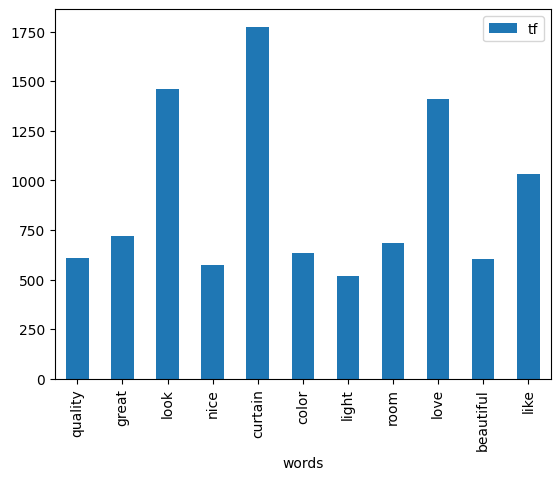

In [35]:
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show(block=True)

<a id="section-14"></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>4.3. |</span></b> <b>Word Cloud</b></div>

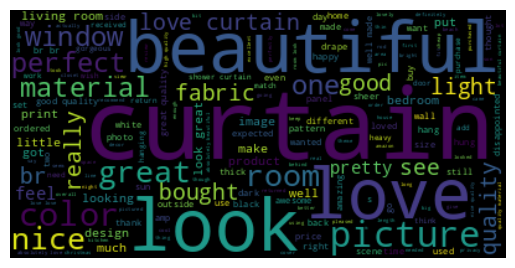

In [36]:
text = " ".join(i for i in df.Review)

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [37]:
# text = " ".join(i for i in df.Review)

# wordcloud = WordCloud(max_font_size=50,
#                       max_words=100,
#                       background_color="black").generate(text)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show(block=True)

<a id="section-15"></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>4.4. |</span></b> <b>Word Cloud by Templates</b></div>

In [38]:
# tr_mask = np.array(Image.open("tr.png"))

# wc = WordCloud(background_color="white",
#                max_words=1000,
#                mask=tr_mask,
#                contour_width=3,
#                contour_color="firebrick")

# wc.generate(text)
# plt.figure(figsize=[10, 10])
# plt.imshow(wc, interpolation="bilinear")
# plt.axis("off")
# plt.show()

<a id="section-16"></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>5 |</span></b> <b>Sentiment Analysis</b></div>

In [39]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [40]:
df["Review"]

0                                                   happy
1        good quality material however panel mis-matched.
2       product fun bedroom windows.<br />imagery bit ...
3       lo unico que gustaria e que sean un poco ma la...
4       great bang buck can't believe quality material...
                              ...                        
5606    great product reasonable money. delivered quic...
5607                                color way panel match
5608    great studio complement entire theme area. pho...
5609                    brought beauty kid room. love it.
5610    cute curtain son room! thick enough keep light...
Name: Review, Length: 5611, dtype: object

In [41]:
sia = SentimentIntensityAnalyzer()

In [42]:
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
1    {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp...
2    {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.0, 'neu': 0.537, 'pos': 0.463, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'comp...
7    {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp...
Name: Review, dtype: object

In [43]:
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

0   0.57
1   0.44
2   0.72
3   0.00
4   0.90
5   0.00
6   0.62
7   0.93
8   0.00
9   0.71
Name: Review, dtype: float64

In [44]:
df["Review"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

0    pos
1    pos
2    pos
3    neg
4    pos
5    neg
6    pos
7    pos
8    neg
9    pos
Name: Review, dtype: object

In [45]:
df["polarity_score"] = df['Review'].apply(lambda x: sia.polarity_scores(x)["compound"])

In [46]:
df.head(20)

,Star,HelpFul,Title,Review,polarity_score
0,5,0,looks great,happy,0.57
1,5,0,Pattern did not align between the two panels.,good quality material however panel mis-matched.,0.44
2,5,0,Imagery is stretched. Still fun.,product fun bedroom windows.<br />imagery bit ...,0.72
3,5,0,Que se ven elegantes muy finas,lo unico que gustaria e que sean un poco ma la...,0.00
4,5,0,Wow great purchase,great bang buck can't believe quality material...,0.90
5,5,0,Not for us,look different photo,0.00
6,5,0,Perfect for spa room,exactly looking for. heavy material. great pri...,0.62
7,5,0,Actually better than expected,"looking picture, thought curtain would thinner...",0.93
8,4,0,Not what expected,much whiter thought would wasn’t really expect...,0.00
9,5,0,Pretty as a Picture,curtain picture shows. 3rd set ambesonne curta...,0.71


In [47]:
df["Sentiment_Label"] = df["Review"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

In [48]:
df.groupby("Sentiment_Label")["Star"].mean()

Sentiment_Label
neg   3.45
pos   4.57
Name: Star, dtype: float64

In [49]:
df.head()

,Star,HelpFul,Title,Review,polarity_score,Sentiment_Label
0,5,0,looks great,happy,0.57,pos
1,5,0,Pattern did not align between the two panels.,good quality material however panel mis-matched.,0.44,pos
2,5,0,Imagery is stretched. Still fun.,product fun bedroom windows.<br />imagery bit ...,0.72,pos
3,5,0,Que se ven elegantes muy finas,lo unico que gustaria e que sean un poco ma la...,0.00,neg
4,5,0,Wow great purchase,great bang buck can't believe quality material...,0.90,pos


<a id="section-17"></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>6 |</span></b> <b>  Modelling</b></div>

In [50]:
# Test-Train
train_x, test_x, train_y, test_y = train_test_split(df["Review"],
                                                    df["Sentiment_Label"],
                                                    random_state=42)

In [51]:
# TF-IDF Word Level
tf_idf_word_vectorizer = TfidfVectorizer().fit(train_x)
x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

In [52]:
# TF-IDF N-Gram Level (2,2)
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 2)).fit(train_x)
x_train_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(train_x)
x_test_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(test_x)

<a id="section-18"></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>6.1. |</span></b> <b>Logistic Regression</b></div>

In [53]:
# Modelling(Logistic Regression - word level) 
log_model_word = LogisticRegression().fit(x_train_tf_idf_word, train_y)
y_pred_word = log_model_word.predict(x_test_tf_idf_word)

print(classification_report(y_pred_word, test_y))

              precision    recall  f1-score   support

         neg       0.31      0.97      0.47        72
         pos       1.00      0.89      0.94      1331

    accuracy                           0.89      1403
   macro avg       0.66      0.93      0.71      1403
weighted avg       0.96      0.89      0.91      1403



In [54]:
# Cross Validation
cross_val_score(log_model_word, x_test_tf_idf_word, test_y, cv=5).mean()

0.8538891713268937

In [55]:
# Randomly selecting comments from the data and asking them to the model
random_review = pd.Series(df["Review"].sample(1).values)
new_comment = CountVectorizer().fit(train_x).transform(random_review)
pred = log_model_word.predict(new_comment)
print(f'Review:  {random_review[0]} \n Prediction: {pred}')

Review:  awesome!!! great quality. allows light through. perfect son.:) 
 Prediction: ['pos']


In [56]:
# Modelling(Logistic Regression - ngram level) 
log_model_ngram = LogisticRegression().fit(x_train_tf_idf_ngram, train_y)
y_pred_ngram = log_model_ngram.predict(x_test_tf_idf_ngram)

print(classification_report(y_pred_ngram, test_y))

              precision    recall  f1-score   support

         neg       0.02      1.00      0.04         4
         pos       1.00      0.84      0.92      1399

    accuracy                           0.84      1403
   macro avg       0.51      0.92      0.48      1403
weighted avg       1.00      0.84      0.91      1403



In [57]:
# Cross Validation
cross_val_score(log_model_ngram, x_test_tf_idf_ngram, test_y, cv=5).mean()

0.841057447890188

In [58]:
# Randomly selecting comments from the data and asking them to the model
random_review = pd.Series(df["Review"].sample(1).values)
new_comment = tf_idf_ngram_vectorizer.transform(random_review)
pred = log_model_ngram.predict(new_comment)
print(f'Review:  {random_review[0]} \n Prediction: {pred}')

Review:  look great. hang nicely. dark room dark may stand much, they'll still good. 
 Prediction: ['pos']


<a id="section-19"></a>
# <div style="padding: 30px; color:white; margin:10; font-size:75%; text-align:left; display:fill; border-radius:10px; background-color:#3b3745"><b><span style='color:#F1A424'>6.2. |</span></b> <b>Random Forests</b></div>

In [59]:
# Modelling (Random Forest)
rf_model_word = RandomForestClassifier().fit(x_train_tf_idf_word, train_y)
print(classification_report(y_pred_word, test_y))

              precision    recall  f1-score   support

         neg       0.31      0.97      0.47        72
         pos       1.00      0.89      0.94      1331

    accuracy                           0.89      1403
   macro avg       0.66      0.93      0.71      1403
weighted avg       0.96      0.89      0.91      1403



In [60]:
cross_val_score(rf_model_word, x_test_tf_idf_word, test_y, cv=5, n_jobs=-1).mean()

0.9002109811896288

In [61]:
rf_model_ngram = RandomForestClassifier().fit(x_train_tf_idf_ngram, train_y)
y_pred_ngram = rf_model_ngram.predict(x_test_tf_idf_ngram)
print(classification_report(test_y, y_pred_ngram))

              precision    recall  f1-score   support

         neg       0.65      0.08      0.14       223
         pos       0.85      0.99      0.92      1180

    accuracy                           0.85      1403
   macro avg       0.75      0.53      0.53      1403
weighted avg       0.82      0.85      0.79      1403



In [62]:
cross_val_score(rf_model_ngram, x_test_tf_idf_ngram, test_y, cv=5, n_jobs=-1).mean()

0.8467590238942553